Лысенко Никита 4.8 2020

# House Prices: Advanced Regression Techniques

Predict sales prices and practice feature engineering, RFs, and gradient boosting

Основным методом обучения я выбрал случайный лес.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)

In [3]:
pd.set_option('display.max_columns', None)

## Начнём знакомиться с данными

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
y = train['SalePrice']

In [5]:
train.shape

(1460, 81)

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Имеется 81 признак, из которых 38 числовых и 43 категориальных:

In [8]:
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
len(numeric_columns)

38

Также среди числовых признаков есть 3 категориальных, которые необходимо отделить. 

In [10]:
object_int_columns = ['MSSubClass', 'OverallQual', 'OverallCond']

In [11]:
numeric_columns = numeric_columns.drop(object_int_columns)
numeric_columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
object_columns = train.select_dtypes(include=['object']).columns
object_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
len(object_columns)

43

## Подготовка данных

Для успешного обучения нашей модели необходимо оба датасета привести в подобающий вид. 

Обработка данных разделяется на несколько этапов:

    1) Обработка пропущенных значений
    2) Удаление выбросов
    3) Нормализация данных
    4) Feature Engineering
    5) Трансформация искажённых числовых признаков
    6) Удаление признаков с высоким коэффициентом корреляции
    7) Превращение категориальных признаков в числовые 
    
Так как в нашем датасете довольно мало данных (1460 объектов), важно их сохранить по максимуму.

### 1. Обработка пропущенных значений

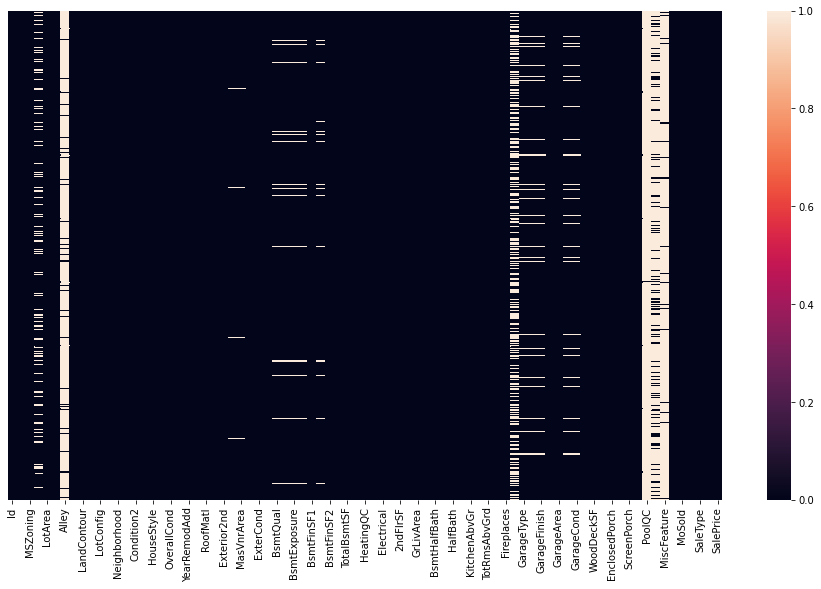

In [14]:
plt.figure(figsize=(16,9))
sns.heatmap(train.isnull(), yticklabels=False)

График heatmap по пустым значениям позволяет увидеть, что происходит с нашими данными. Чёрные области - наличие какого-либо значения, а белые - отсутствие. На глаз видно, что имеется 4 почти белых столбца, означающие почти полное отсутсвие значений. 

In [15]:
def calculate_null_values(df):
    """ Функция для подсчёта пропущенных значений. """
    res = dict()
    for col in df.columns:
        null_count = df[col].isnull().sum()
        if null_count > 0:
            null_percent = round(null_count / df.shape[0] * 100, 4)
            res[col] = (null_count, null_percent)
            print('{}:{} \t{}, \t{}%'.format(col, '\t' if len(col) < 7 else '', null_count, null_percent))
    return res

#### Заполенение пропусков в обучающей выборке train.csv

(Название колонки: количество пропусков, % от общего числа строк)

In [16]:
null_values_train = calculate_null_values(train)

LotFrontage: 	259, 	17.7397%
Alley:	 	1369, 	93.7671%
MasVnrType: 	8, 	0.5479%
MasVnrArea: 	8, 	0.5479%
BsmtQual: 	37, 	2.5342%
BsmtCond: 	37, 	2.5342%
BsmtExposure: 	38, 	2.6027%
BsmtFinType1: 	37, 	2.5342%
BsmtFinType2: 	38, 	2.6027%
Electrical: 	1, 	0.0685%
FireplaceQu: 	690, 	47.2603%
GarageType: 	81, 	5.5479%
GarageYrBlt: 	81, 	5.5479%
GarageFinish: 	81, 	5.5479%
GarageQual: 	81, 	5.5479%
GarageCond: 	81, 	5.5479%
PoolQC:	 	1453, 	99.5205%
Fence:	 	1179, 	80.7534%
MiscFeature: 	1406, 	96.3014%


In [17]:
len(null_values_train)

19

В обучающей выборке имеем 19 признаков c пропущенными значениями 

Глядя на heatmap и процентное соотношение пропусков в датасете, можно сделать следующие выводы:

    1) Есть 4 признака ('Alley', 'PoolQC', 'Fence', 'MiscFeature'), количество пропусков в которых слишком велико, следовательно от них можно избавиться;
    2) Один признак 'FireplaceQu' имеет около 50% пропусков. Соответственно, относительно этого признака нужно будет принять исключительное решение;
    3) Подавляющее большинство признаков имеют небольшой процент пропусков, поэтому есть смысл "побороться" за такие данные.

In [18]:
# 1. избавляемся от "плохих" признаков в обеих выборках
to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
train.drop(to_drop, axis=1, inplace=True)
object_columns = object_columns.drop(to_drop)

In [19]:
train.shape

(1460, 77)

In [20]:
# 2. более подробно посмотрим на признак 'FireplaceQu'
train['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

Признак 'FireplaceQu' или Fireplace quality описывает качество домашнего камина, следовательно, пропущенные признаки означают отсутствие камина как такогого. Лучшим способом "борьбы" в данной ситуации будет ввести новую категорию "Na".

In [21]:
train['FireplaceQu'] = train['FireplaceQu'].fillna('Na')

In [22]:
# 3. Обрабатываем остальные пропуски

In [23]:
null_values_train = calculate_null_values(train)

LotFrontage: 	259, 	17.7397%
MasVnrType: 	8, 	0.5479%
MasVnrArea: 	8, 	0.5479%
BsmtQual: 	37, 	2.5342%
BsmtCond: 	37, 	2.5342%
BsmtExposure: 	38, 	2.6027%
BsmtFinType1: 	37, 	2.5342%
BsmtFinType2: 	38, 	2.6027%
Electrical: 	1, 	0.0685%
GarageType: 	81, 	5.5479%
GarageYrBlt: 	81, 	5.5479%
GarageFinish: 	81, 	5.5479%
GarageQual: 	81, 	5.5479%
GarageCond: 	81, 	5.5479%


In [24]:
train[null_values_train.keys()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   GarageType    1379 non-null   object 
 10  GarageYrBlt   1379 non-null   float64
 11  GarageFinish  1379 non-null   object 
 12  GarageQual    1379 non-null   object 
 13  GarageCond    1379 non-null   object 
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


Имеем 3 числовых и 11 категориальных признаков.

Для числовых признаков пропущенные значения заполним средними значениями:

In [25]:
numeric_missing_columns_train = train[null_values_train.keys()].select_dtypes(include=['float64']).columns
for col in numeric_missing_columns_train:
    train[col] = train[col].fillna(train[col].mean())
    
del numeric_missing_columns_train

С каждым категориальным признаком необходимо провести анализ.

In [26]:
categorical_missing_columns_train = train[null_values_train.keys()].select_dtypes(include=['object']).columns
categorical_missing_columns_train

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

Пропущенные категориальные можно заполнять двумя способами:
    
    1) взять mode и пропуски заполнить самым часто встречающимся значением
    2) ввести новую категорию NA
  
В зависимости от того, за что отвечает признак, мы и будем принимать решение по дальнейшей обработке.

В ходе детального изучения признаков было выяснено, что отсутствующее значение в датасете означает отсутствие признака как такогого в предполагаемом доме. Следовательно, для каждого (за исключением двух) признака необходимо ввести новую категорию. 

В признаке "Electrical" не предусмотрена категория для пустого значения, следовательно, в данной ситуации все пропуски будем заполнять наиболее встречающимся значением, то есть модой.
В признаке "MasVnrType" предусмотрена категория "none" для отсутствующего значения.

In [27]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

In [28]:
categorical_missing_columns_train = categorical_missing_columns_train.drop('Electrical')
categorical_missing_columns_train = categorical_missing_columns_train.drop('MasVnrType')
for col in categorical_missing_columns_train:
    train[col] = train[col].fillna('Na')
    
del categorical_missing_columns_train

In [29]:
miss_cols_train_add_to_none = ['MasVnrType']
for col in miss_cols_train_add_to_none:
    train[col] = train[col].fillna('None')
    
del miss_cols_train_add_to_none

Проверим, все ли мы обработали пустые значения:

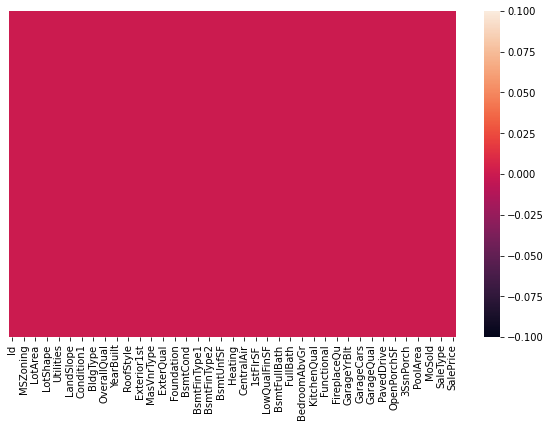

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(train.isnull(), yticklabels=False)

In [31]:
null_values_train = calculate_null_values(train)
null_values_train

{}

Как видно по графику heatmap и функции calculate_null_values(), в тренировочном датасете больше нет пропущенных значений.

### Заполенение пропусков в тестовой выборке test.csv

In [32]:
null_values_test = calculate_null_values(test)

MSZoning: 	4, 	0.2742%
LotFrontage: 	227, 	15.5586%
Alley:	 	1352, 	92.6662%
Utilities: 	2, 	0.1371%
Exterior1st: 	1, 	0.0685%
Exterior2nd: 	1, 	0.0685%
MasVnrType: 	16, 	1.0966%
MasVnrArea: 	15, 	1.0281%
BsmtQual: 	44, 	3.0158%
BsmtCond: 	45, 	3.0843%
BsmtExposure: 	44, 	3.0158%
BsmtFinType1: 	42, 	2.8787%
BsmtFinSF1: 	1, 	0.0685%
BsmtFinType2: 	42, 	2.8787%
BsmtFinSF2: 	1, 	0.0685%
BsmtUnfSF: 	1, 	0.0685%
TotalBsmtSF: 	1, 	0.0685%
BsmtFullBath: 	2, 	0.1371%
BsmtHalfBath: 	2, 	0.1371%
KitchenQual: 	1, 	0.0685%
Functional: 	2, 	0.1371%
FireplaceQu: 	730, 	50.0343%
GarageType: 	76, 	5.209%
GarageYrBlt: 	78, 	5.3461%
GarageFinish: 	78, 	5.3461%
GarageCars: 	1, 	0.0685%
GarageArea: 	1, 	0.0685%
GarageQual: 	78, 	5.3461%
GarageCond: 	78, 	5.3461%
PoolQC:	 	1456, 	99.7944%
Fence:	 	1169, 	80.1234%
MiscFeature: 	1408, 	96.5045%
SaleType: 	1, 	0.0685%


In [33]:
len(null_values_test)

33

В тестовой выборке имеем 33 признака c пропущенными значениями

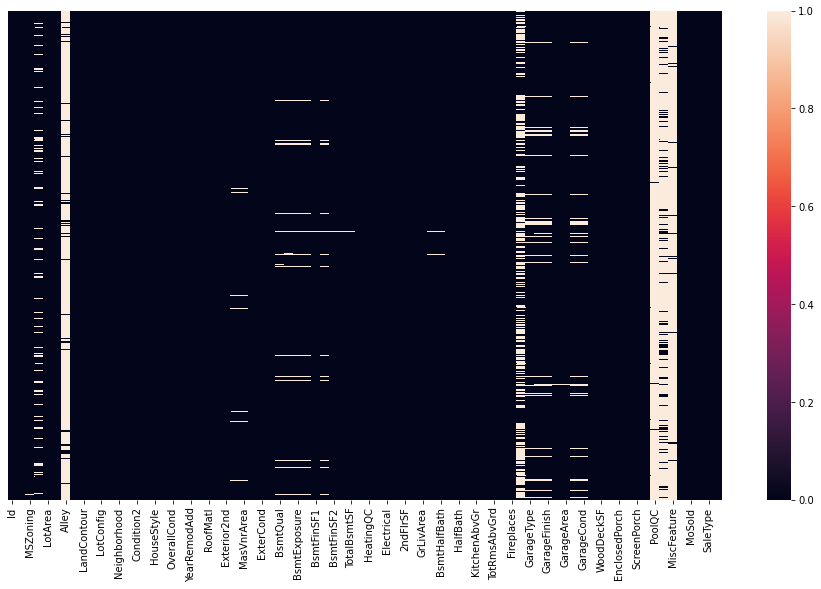

In [34]:
plt.figure(figsize=(16,9))
sns.heatmap(test.isnull(), yticklabels=False)

Имеем 3 числовых и 11 категориальных признаков.

Так же как и в тренировочной, избавляемся от признаков со слишком большим процентом пропусков

In [35]:
# 1. избавляемся от "плохих" признаков в обеих выборках
test.drop(to_drop, axis=1, inplace=True)

In [36]:
null_values_test = calculate_null_values(test)

MSZoning: 	4, 	0.2742%
LotFrontage: 	227, 	15.5586%
Utilities: 	2, 	0.1371%
Exterior1st: 	1, 	0.0685%
Exterior2nd: 	1, 	0.0685%
MasVnrType: 	16, 	1.0966%
MasVnrArea: 	15, 	1.0281%
BsmtQual: 	44, 	3.0158%
BsmtCond: 	45, 	3.0843%
BsmtExposure: 	44, 	3.0158%
BsmtFinType1: 	42, 	2.8787%
BsmtFinSF1: 	1, 	0.0685%
BsmtFinType2: 	42, 	2.8787%
BsmtFinSF2: 	1, 	0.0685%
BsmtUnfSF: 	1, 	0.0685%
TotalBsmtSF: 	1, 	0.0685%
BsmtFullBath: 	2, 	0.1371%
BsmtHalfBath: 	2, 	0.1371%
KitchenQual: 	1, 	0.0685%
Functional: 	2, 	0.1371%
FireplaceQu: 	730, 	50.0343%
GarageType: 	76, 	5.209%
GarageYrBlt: 	78, 	5.3461%
GarageFinish: 	78, 	5.3461%
GarageCars: 	1, 	0.0685%
GarageArea: 	1, 	0.0685%
GarageQual: 	78, 	5.3461%
GarageCond: 	78, 	5.3461%
SaleType: 	1, 	0.0685%


In [37]:
test[null_values_test.keys()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   LotFrontage   1232 non-null   float64
 2   Utilities     1457 non-null   object 
 3   Exterior1st   1458 non-null   object 
 4   Exterior2nd   1458 non-null   object 
 5   MasVnrType    1443 non-null   object 
 6   MasVnrArea    1444 non-null   float64
 7   BsmtQual      1415 non-null   object 
 8   BsmtCond      1414 non-null   object 
 9   BsmtExposure  1415 non-null   object 
 10  BsmtFinType1  1417 non-null   object 
 11  BsmtFinSF1    1458 non-null   float64
 12  BsmtFinType2  1417 non-null   object 
 13  BsmtFinSF2    1458 non-null   float64
 14  BsmtUnfSF     1458 non-null   float64
 15  TotalBsmtSF   1458 non-null   float64
 16  BsmtFullBath  1457 non-null   float64
 17  BsmtHalfBath  1457 non-null   float64
 18  KitchenQual   1458 non-null 

Пропущенные числовые значения также заполним средними значениями:

In [38]:
numeric_missing_columns_test = test[null_values_test.keys()].select_dtypes(include=['float64']).columns
for col in numeric_missing_columns_test:
    test[col] = test[col].fillna(test[col].mean())
    
del numeric_missing_columns_test

##### Теперь заполним пустоты с категориальными значениями. 

In [39]:
categorical_missing_columns_test = test[null_values_test.keys()].select_dtypes(include=['object']).columns
categorical_missing_columns_test

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

В ходе детального изучения признаков в тестовой выборке было выяснено, что решение по устранению пустых объектов необходимо принимать, глядя на описание каждого признака.

    FireplaceQu - вводим новую категорию NA
    MSZoning - mode, заполняем пустоты наиболее встречающимся значением
    Utilities - mode, заполняем пустоты наиболее встречающимся значением
    Exterior1st - mode, заполняем пустоты наиболее встречающимся значением
    Exterior2nd - mode, заполняем пустоты наиболее встречающимся значением
    MasVnrType - есть категория none, в которубю необходимо добавить все пропущенные значения
    BsmtQual - вводим новую категорию NA
    BsmtCond - вводим новую категорию NA
    BsmtExposure - вводим новую категорию NA
    BsmtFinType1 - вводим новую категорию NA
    BsmtFinType2 - вводим новую категорию NA
    KitchenQual - mode, заполняем пустоты наиболее встречающимся значением
    Functional - mode, заполняем пустоты наиболее встречающимся значением
    GarageType - вводим новую категорию NA
    GarageFinish - вводим новую категорию NA
    GarageQual - вводим новую категорию NA
    GarageCond - вводим новую категорию NA
    SaleType - mode, заполняем пустоты наиболее встречающимся значением

In [40]:
miss_cols_test_mode = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 
                       'SaleType']

miss_cols_test_new_cat_NA = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                             'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

miss_cols_test_add_to_none = ['MasVnrType']

In [41]:
for col in miss_cols_test_mode:
    test[col] = test[col].fillna(test[col].mode()[0])

del miss_cols_test_mode

In [42]:
for col in miss_cols_test_new_cat_NA:
    test[col] = test[col].fillna('Na')
    
del miss_cols_test_new_cat_NA

In [43]:
for col in miss_cols_test_add_to_none:
    test[col] = test[col].fillna('None')
    
del miss_cols_test_add_to_none

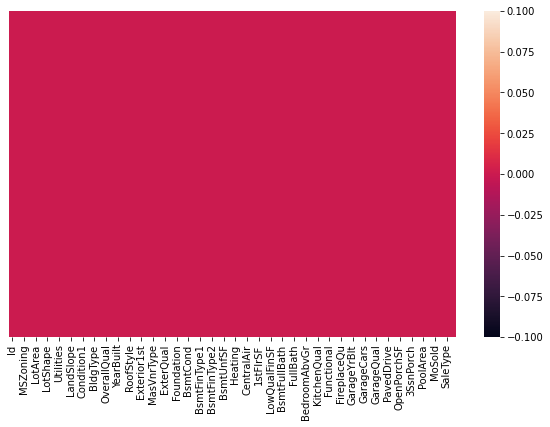

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(test.isnull(), yticklabels=False)

In [45]:
null_values_test = calculate_null_values(test)
null_values_test

{}

Как видно по графику heatmap и функции calculate_null_values(), в тестовом датасете больше нет пропущенных значений.

Первый этап обработки данных завершён.

## 2. Удаление выбросов

In [46]:
# и также практически не чувствителен к выбросам из-за случайного сэмлирования. 

Для того чтобы отследить выбросы, необходимо посмотреть на каждый числовой признак относительно целевого признака. 

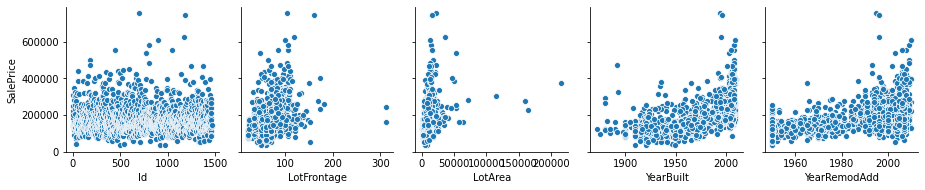

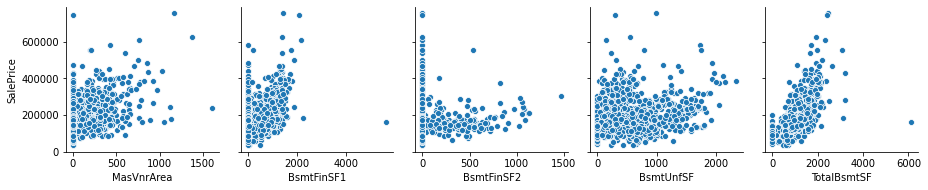

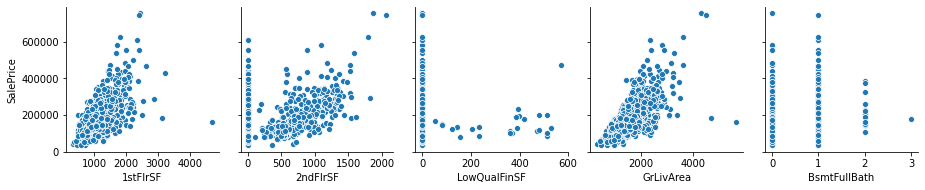

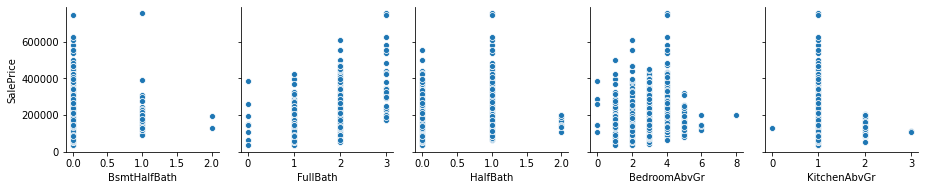

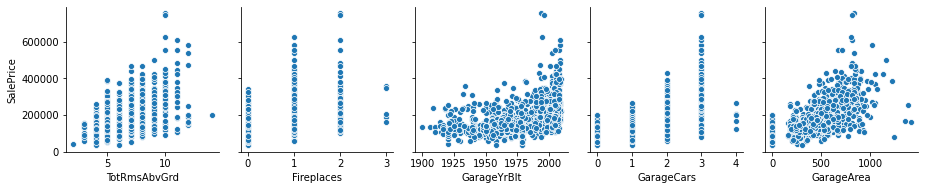

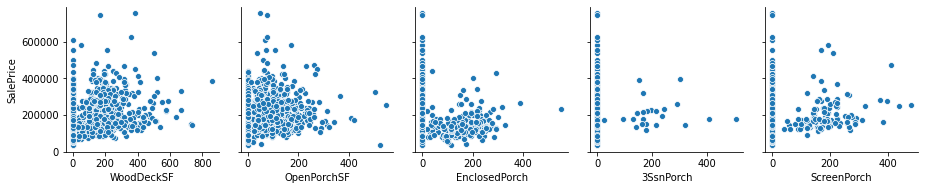

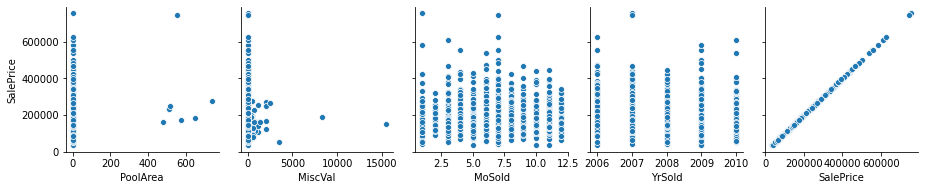

In [47]:
cols5 = []
for i in range(0, len(numeric_columns), 5):
    cols5.append(numeric_columns[i : i + 5])
    
# Далее выыведем графики зависимостей численных признаков от целевой переменной
for x in cols5:
    sns.pairplot(train, y_vars=['SalePrice'], x_vars=x)

Глядя на данные графики, можно сделать выводы о выбросах для каждого признака

Для подавляющего большинства признаков выбросов не наблюдается.
Однако есть признаки, у которых они всё таки наблюдаются:

    "LotArea" > 100000
    "LotFrontage" > 300
    "BsmtFinSF1" > 4000 
    "TotalBsmtSF" > 6000
    "1stFlrSF" > 4000
    "GrLivArea" > 5000
   
Запишем выбросы в переменную, чтобы далее от них избавиться.

In [48]:
outliers = {
    "LotArea": 100000, 
    "LotFrontage": 300,
    "BsmtFinSF1": 4000, 
    "TotalBsmtSF": 6000, 
    "1stFlrSF": 4000, 
    "GrLivArea": 5000
}

In [49]:
train.shape

(1460, 77)

In [50]:
for col in outliers: 
    train = train[train[col] < outliers[col]]

In [51]:
train.shape

(1454, 77)

## 3. Нормализация данных

Алгоритм случайного леса не нуждается в нормализации данных. Следовательно, данный этап предобработки можно пропустить.

## 4. Feature Engineering

In [52]:
train['TotalArea'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train['TotalBath'] = train['BsmtFullBath'] + train['FullBath'] + (train['BsmtHalfBath'] + train['HalfBath'])*0.5

test['TotalArea'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
test['TotalBath'] = test['BsmtFullBath'] + test['FullBath'] + (test['BsmtHalfBath'] + test['HalfBath'])*0.5

to_drop = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath']

train.drop(to_drop, axis=1, inplace=True)
test.drop(to_drop, axis=1, inplace=True)
numeric_columns = numeric_columns.drop(to_drop)
numeric_columns.append(pd.Index(['TotalArea', 'TotalBath']))

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'TotalArea', 'TotalBath'],
      dtype='object')

In [ ]:
STEP 3 : Feature Engineering¶

# Removing features that are not very useful . This can be understood only by doing proper EDA on data

# features = features.drop(['Utilities', 'Street', 'PoolQC',], axis=1)


# Adding new features . Make sure that you understand this. 

# # features['YrBltAndRemod']=features['YearBuilt']+features['YearRemodAdd']
# # features['TotalSF']=features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

# features['Total_sqr_footage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
#                                  features['1stFlrSF'] + features['2ndFlrSF'])

# # features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
# #                                features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))

# features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
#                               features['EnclosedPorch'] + features['ScreenPorch'] +
#                               features['WoodDeckSF'])



## 5. Трансформация искажённых числовых признаков

Искажённые или асимметричные признаки - ещё одна проблема, которая может повлиять на качество модели. Алгоритмы машинного обучения подразумевают, что на вход подаются данные,имеющий гауссово распределие. 

Посмотрим на асимметрию в данных и преобразуем те признаки, у которых коэффициент асимметрии велик.

In [53]:
skewed = train[numeric_columns].apply(lambda x: stats.skew(x.astype('float')))
skewed

Id               -0.002172
LotFrontage       0.737587
LotArea           3.939136
YearBuilt        -0.613934
YearRemodAdd     -0.502464
MasVnrArea        2.693622
BsmtFinSF1        0.799002
BsmtFinSF2        4.279205
BsmtUnfSF         0.916339
LowQualFinSF      8.982890
GrLivArea         1.127647
BedroomAbvGr      0.213924
KitchenAbvGr      4.473226
TotRmsAbvGrd      0.667398
Fireplaces        0.632566
GarageYrBlt      -0.672618
GarageCars       -0.337971
GarageArea        0.133894
WoodDeckSF        1.518666
OpenPorchSF       2.365910
EnclosedPorch     3.078561
3SsnPorch        10.272009
ScreenPorch       4.108107
PoolArea         15.910404
MiscVal          24.469277
MoSold            0.214573
YrSold            0.096121
SalePrice         1.896903
dtype: float64

In [54]:
skewed = skewed[abs(skewed) > 0.65]
skewed

LotFrontage       0.737587
LotArea           3.939136
MasVnrArea        2.693622
BsmtFinSF1        0.799002
BsmtFinSF2        4.279205
BsmtUnfSF         0.916339
LowQualFinSF      8.982890
GrLivArea         1.127647
KitchenAbvGr      4.473226
TotRmsAbvGrd      0.667398
GarageYrBlt      -0.672618
WoodDeckSF        1.518666
OpenPorchSF       2.365910
EnclosedPorch     3.078561
3SsnPorch        10.272009
ScreenPorch       4.108107
PoolArea         15.910404
MiscVal          24.469277
SalePrice         1.896903
dtype: float64

Имеется 24 признака с высоким коэффициентом асимметрии.

In [55]:
len(skewed)

19

Посмотрим на графики распределения наших численных признаков

In [56]:
def plot_skewed(df, skewed):
    plt.figure(figsize=(25,20))
    for i in range(len(skewed)):
        plt.subplot(7, 4, i + 1)
        plt.subplots_adjust(hspace = 0.7, wspace = 0.5)
        ax = sns.distplot(df[skewed.index[i]])
        ax.legend(["Skewness: {:.2f}".format(df[skewed.index[i]].skew())], fontsize = 'xx-large')
        ax.set_xlabel(skewed.index[i], fontsize = 20)

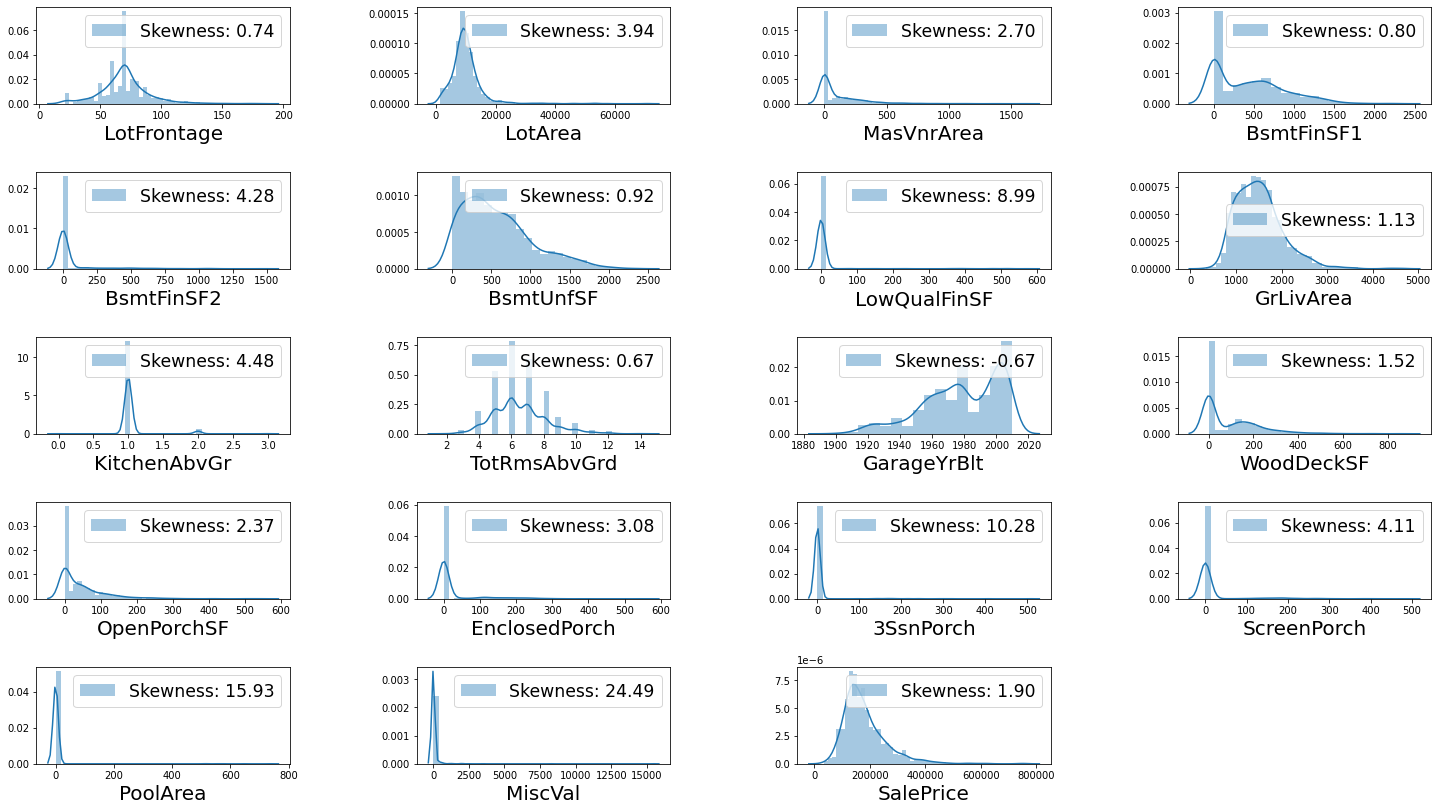

In [57]:
plot_skewed(df=train, skewed=skewed)

По графикам видно, что большинство наших признаков имеют позитивную ассиметрию (или правую). Побороться с данным видос ассиметрии можно с помощью логарифмирования.

Для примера посмотрим на распределение данных целевого признака "SalePrice" до и после логарифмирования. 

Text(0.5, 0, 'SalePrice')

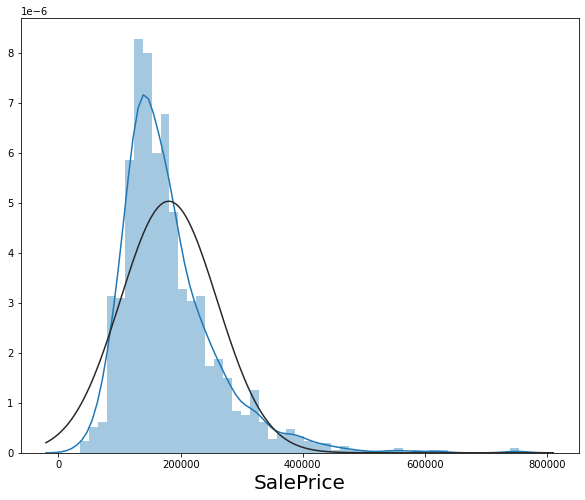

In [58]:
ax = sns.distplot(train['SalePrice'], fit=stats.norm)
ax.set_xlabel('SalePrice', fontsize = 20)

Text(0.5, 0, 'SalePrice')

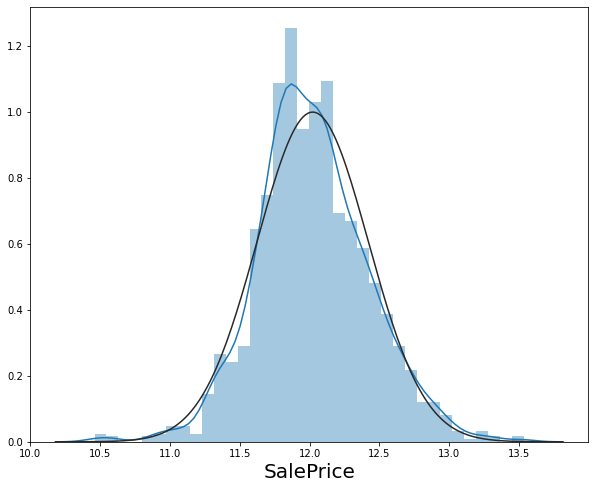

In [59]:
ax = sns.distplot(np.log(train['SalePrice']), fit=stats.norm)
ax.set_xlabel('SalePrice', fontsize = 20)

Видим, что после логарифмирования целевой признак действительно приобрел вид гауссового распределения.

Далее применим логарифмирование для всех числовых признаков в обоих датасетах. 

In [60]:
# так как log() превращает 0 в -inf, то используем функцию log(x+1), которая лучше работает с маленькими значениями
for col in skewed.index:
    train[col] = np.log(train[col] + 1)
    if col == 'SalePrice':
        continue
    test[col] = np.log(test[col] + 1)

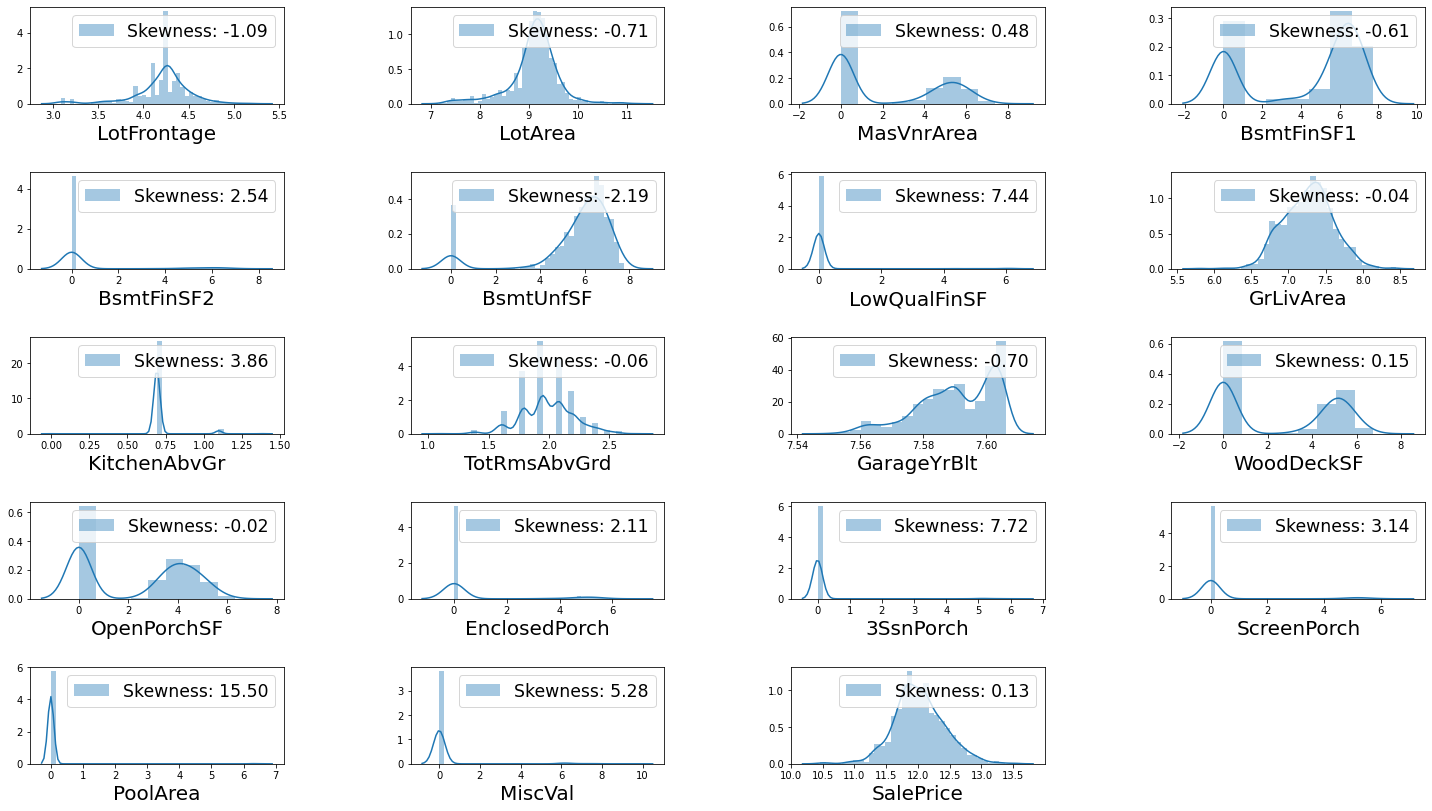

In [61]:
plot_skewed(df=train, skewed=skewed)

In [62]:
skewed = train[numeric_columns].apply(lambda x: stats.skew(x.astype('float')))
skewed = skewed[abs(skewed) > 0.65]
len(skewed)

12

С помощью логарифмирования удалось снизить коэффициент асимметрии у некоторых признаков, однако от остальных, у которых коэффициент велик, можно избавиться.

In [63]:
to_drop = skewed[abs(skewed) > 1]
to_drop

LotFrontage      -1.093353
BsmtFinSF2        2.535243
BsmtUnfSF        -2.183377
LowQualFinSF      7.436501
KitchenAbvGr      3.855987
EnclosedPorch     2.103171
3SsnPorch         7.710341
ScreenPorch       3.138850
PoolArea         15.480172
MiscVal           5.271790
dtype: float64

In [64]:
to_drop = list(to_drop.index)
train.drop(to_drop, axis=1, inplace=True)
test.drop(to_drop, axis=1, inplace=True)
numeric_columns = pd.Index(numeric_columns.drop(to_drop))

In [65]:
del skewed

## 6. Удаление признаков с высоким коэффициентом корреляции

На данном шаге с помощью матрицы корреляции можно установить зависимость среди признаков. Если в датаете присутствует 2 или более признака, чья линейная зависимость близка к единице, то качество модели снизится.

(23.5, -0.5)

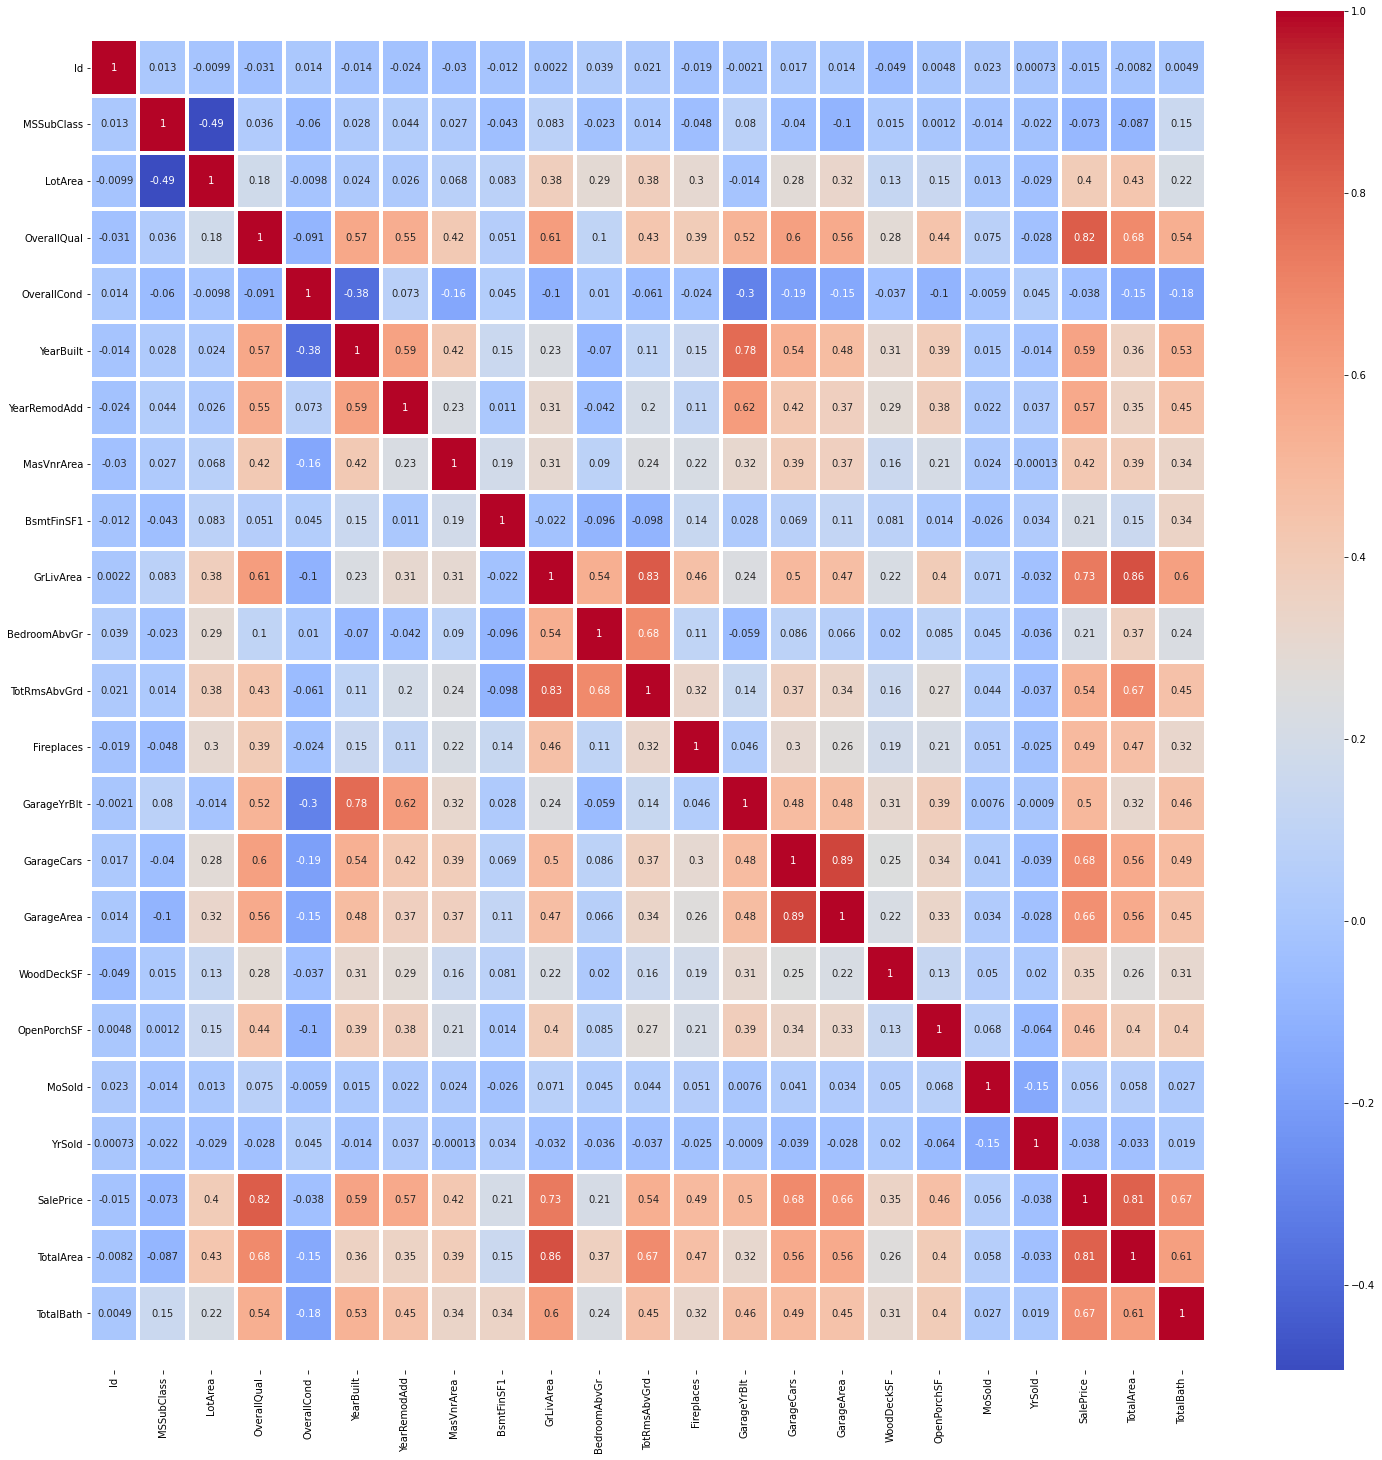

In [66]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(train.corr(), cmap = "coolwarm", annot=True, linewidth=3)

# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Посмотрим на признаки с максимальными значениями корреляции по отношению друг к другу

In [67]:
corr = train.corr()
corr_list = list()
for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        col1 = numeric_columns[i];
        col2 = numeric_columns[j];
        if corr[col1][col2] > 0.65:
            corr_list.append((col1, col2, corr[col1][col2]))

In [68]:
list(reversed(sorted(corr_list, key=lambda x: x[-1])))

[('GarageCars', 'GarageArea', 0.8879255985464204),
 ('GrLivArea', 'TotRmsAbvGrd', 0.8294525081156641),
 ('YearBuilt', 'GarageYrBlt', 0.7796622393567705),
 ('GrLivArea', 'SalePrice', 0.7340473091546997),
 ('BedroomAbvGr', 'TotRmsAbvGrd', 0.6841712997607883),
 ('GarageCars', 'SalePrice', 0.6816053774519594),
 ('GarageArea', 'SalePrice', 0.656710872737529)]

In [69]:
to_drop = ['GarageCars', 'TotRmsAbvGrd', 'GarageYrBlt']

In [70]:
train.drop(to_drop, axis=1, inplace=True)
test.drop(to_drop, axis=1, inplace=True)
numeric_columns = numeric_columns.drop(to_drop)

In [71]:
train.shape

(1454, 59)

## 7. Превращение категориальных признаков в числовые

Посмотрим подробнее на каждый категориальный признак

In [72]:
def plot_barh(df, cols, ncols=4):
    num_col = 0
    for i in range(len(cols) // ncols):
        fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(12, 3), dpi=200)
        plt.subplots_adjust(hspace = 0.7, wspace = 0.5)
        for j in range(ncols):
            num_col += 1
            ax = df[cols[num_col]].value_counts().plot.barh(ax=axes[j])
            ax.set_xlabel(cols[num_col], fontsize = 10)

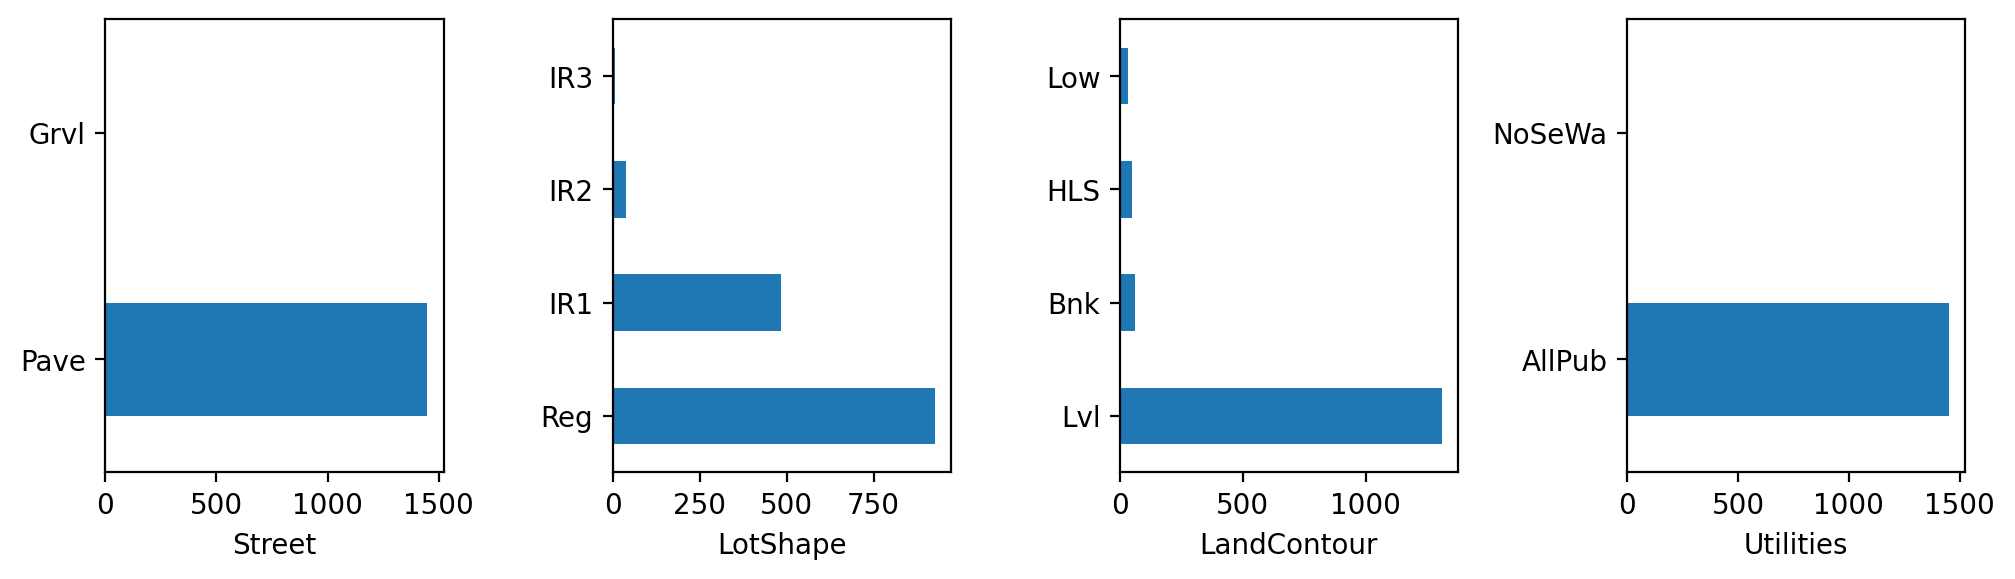

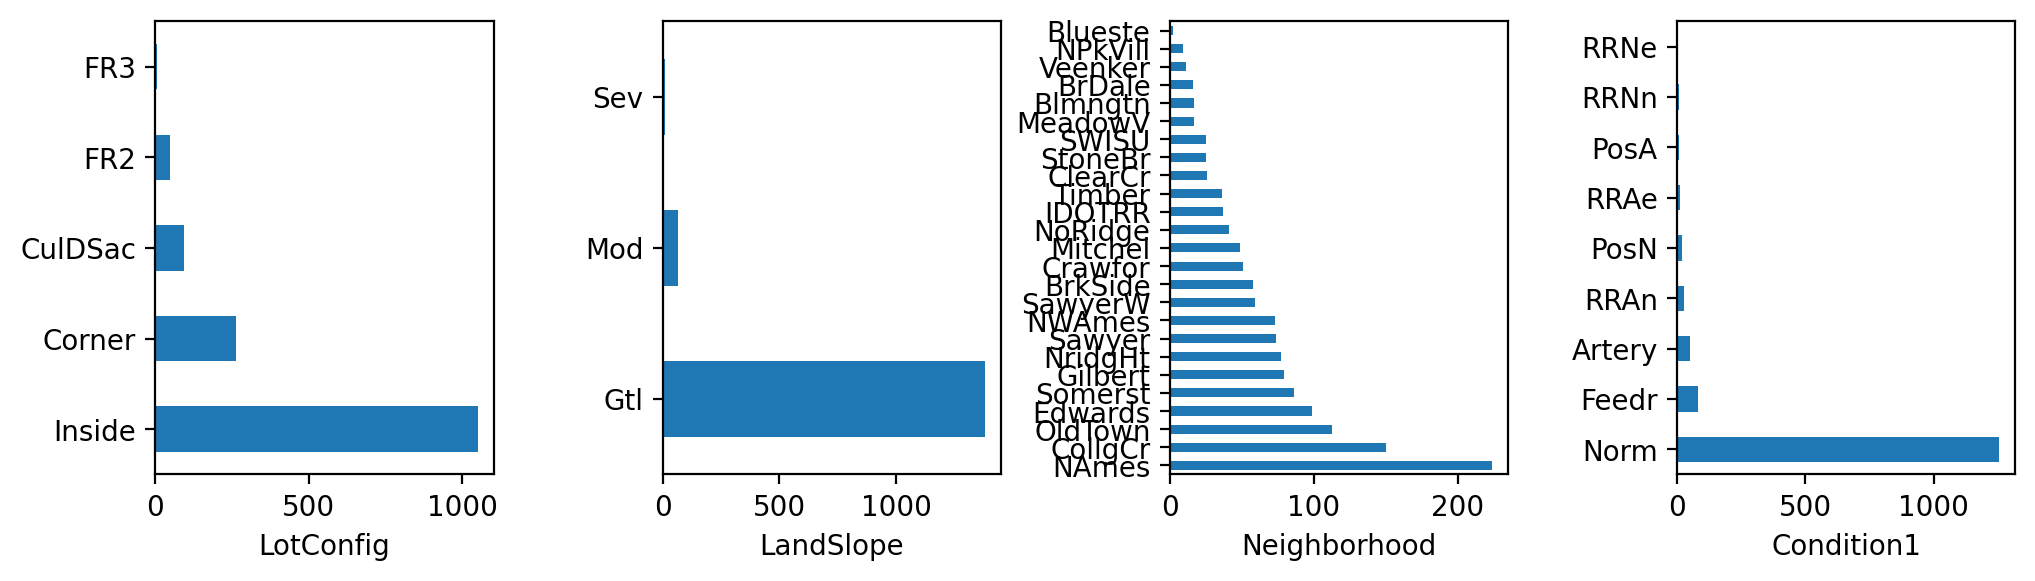

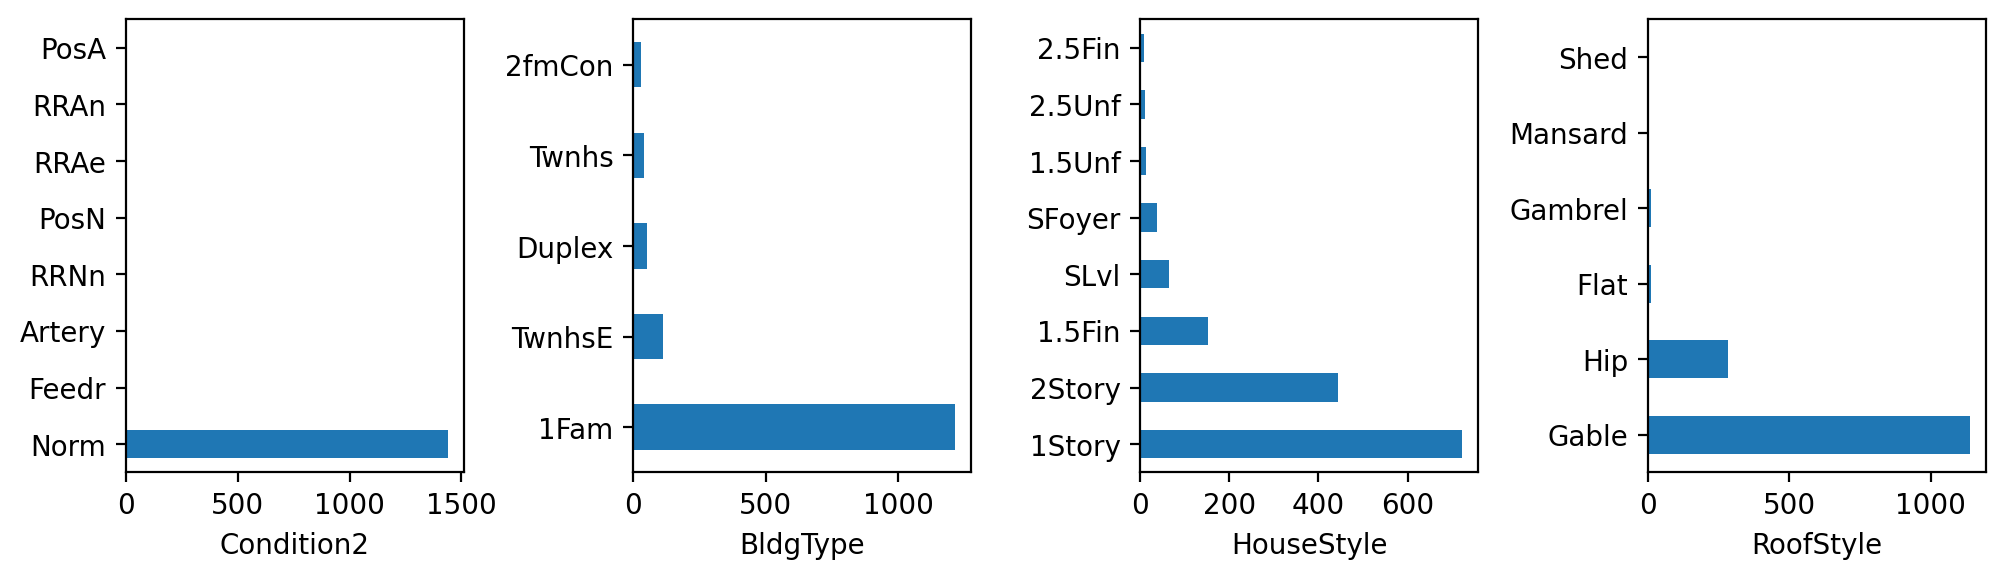

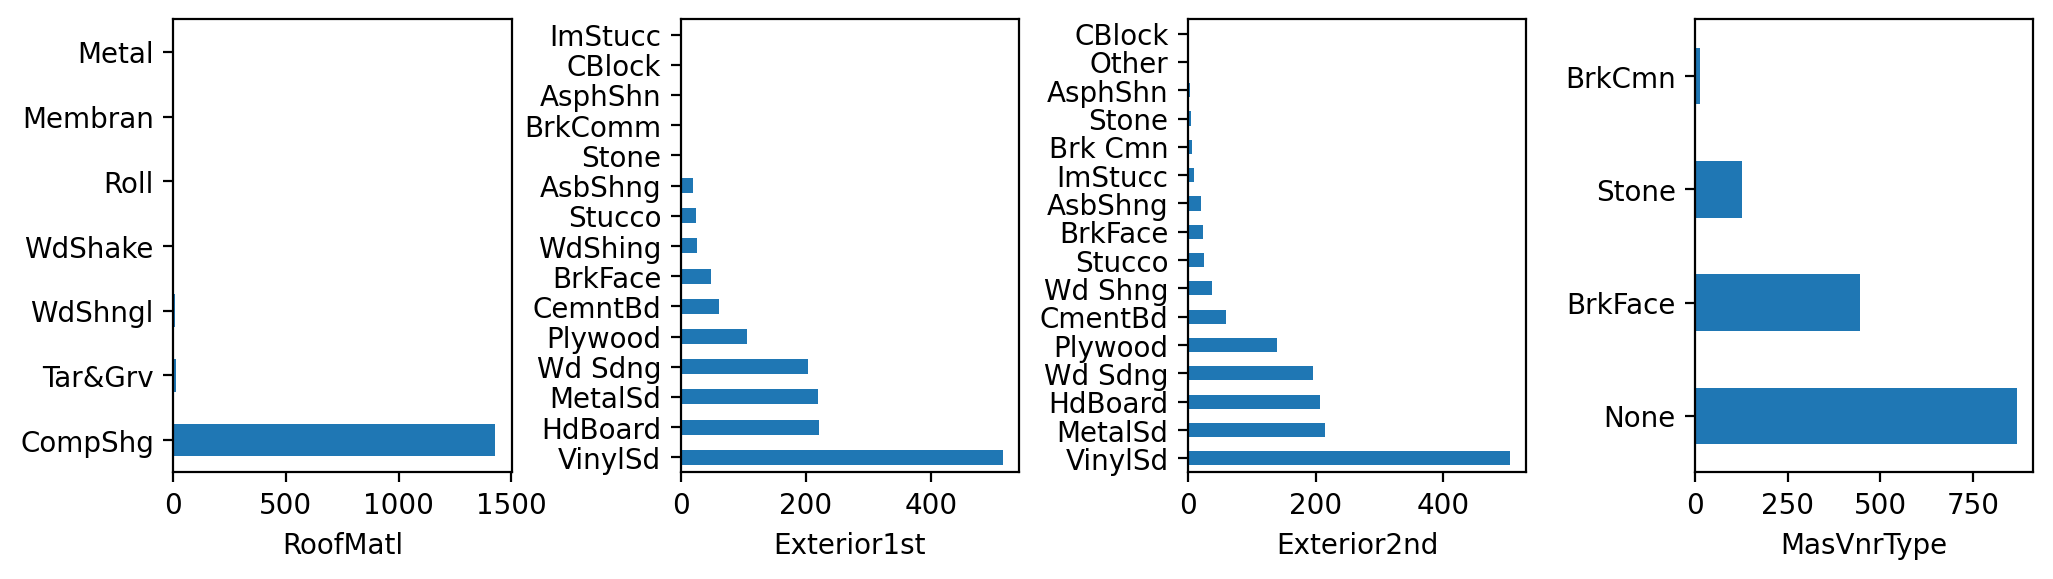

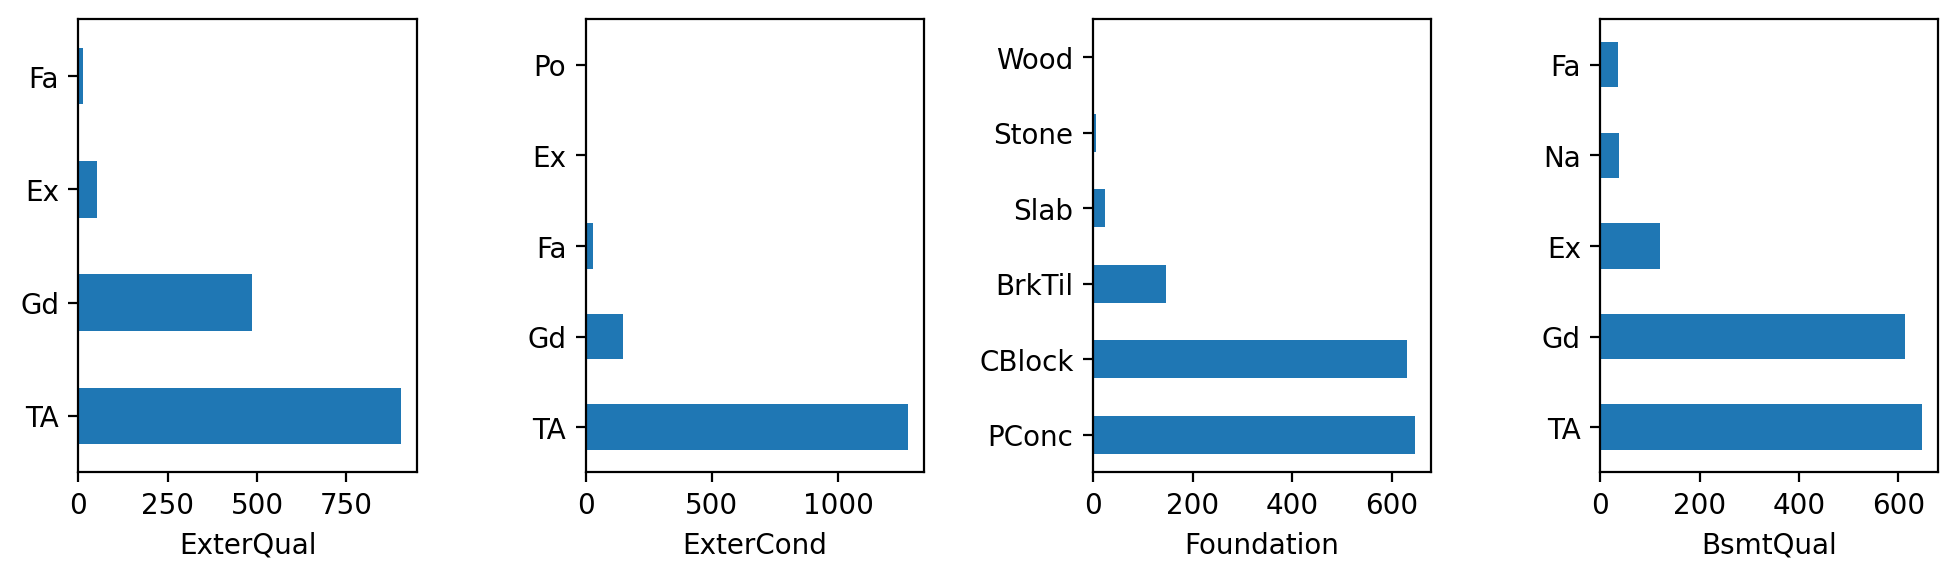

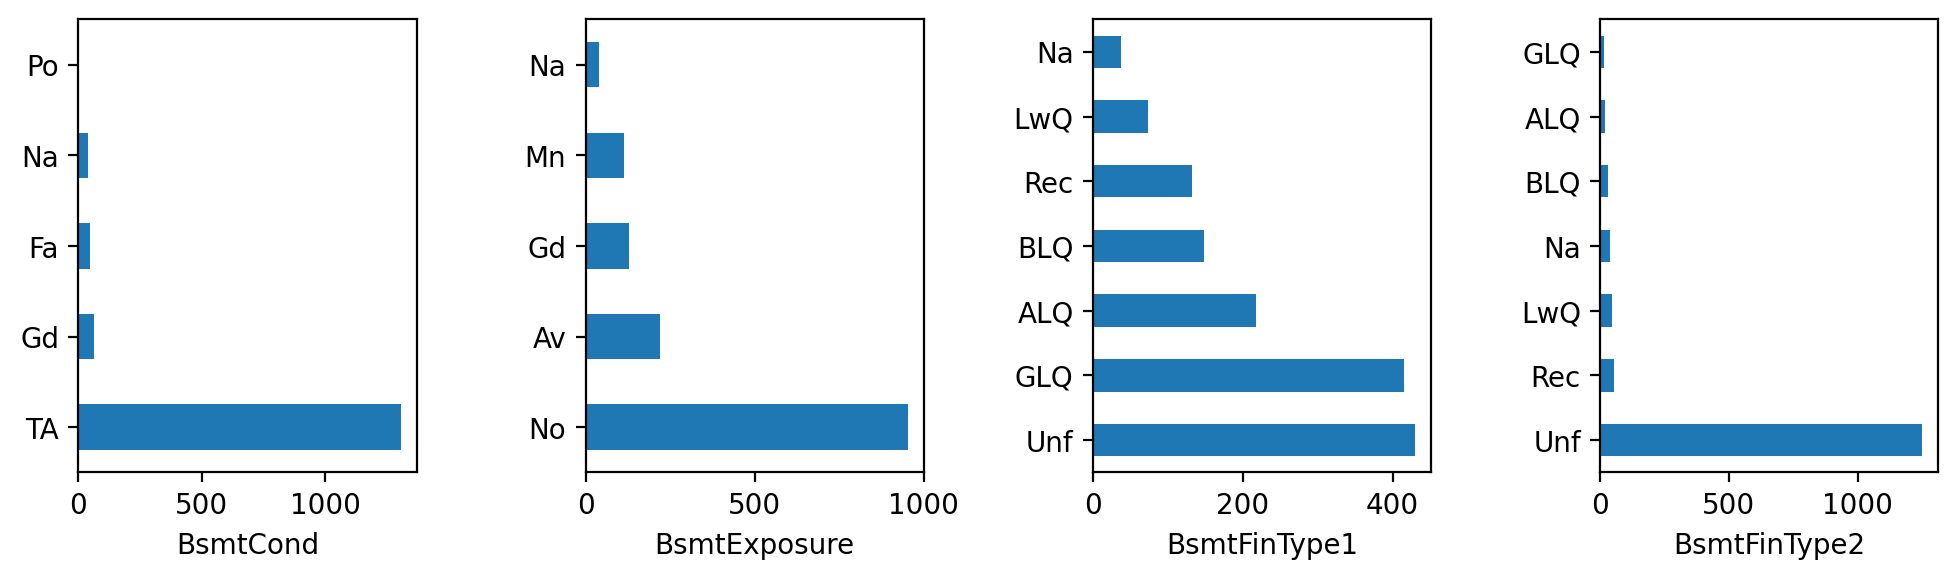

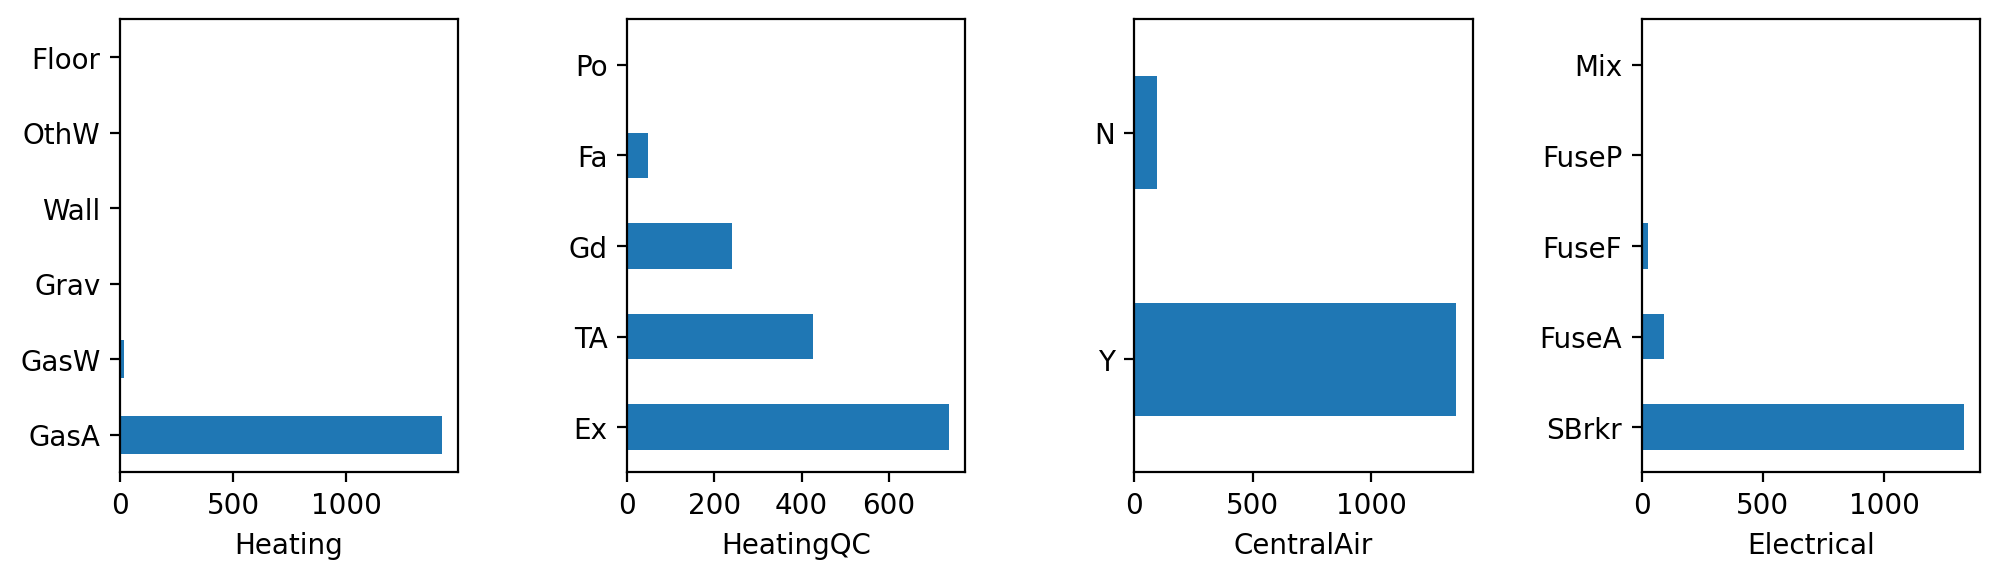

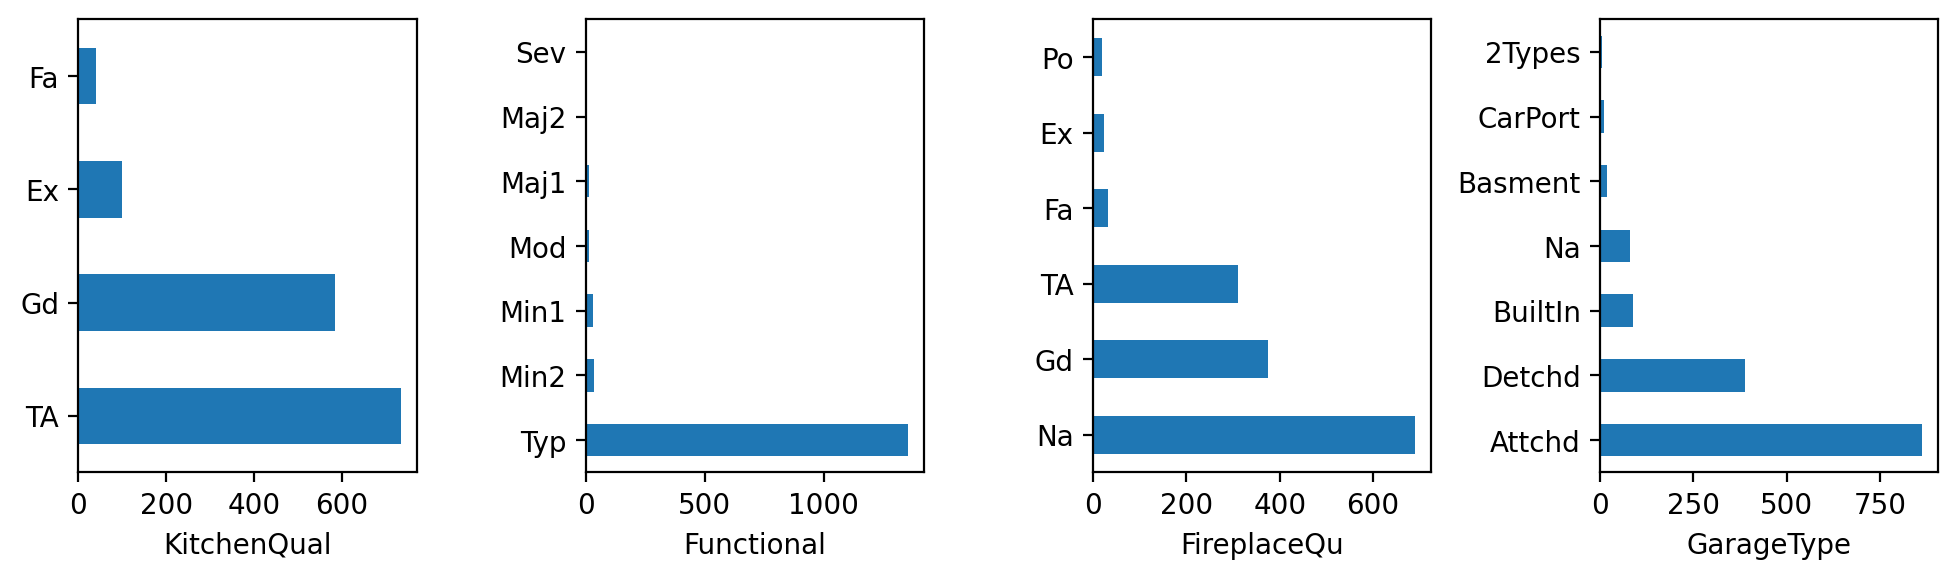

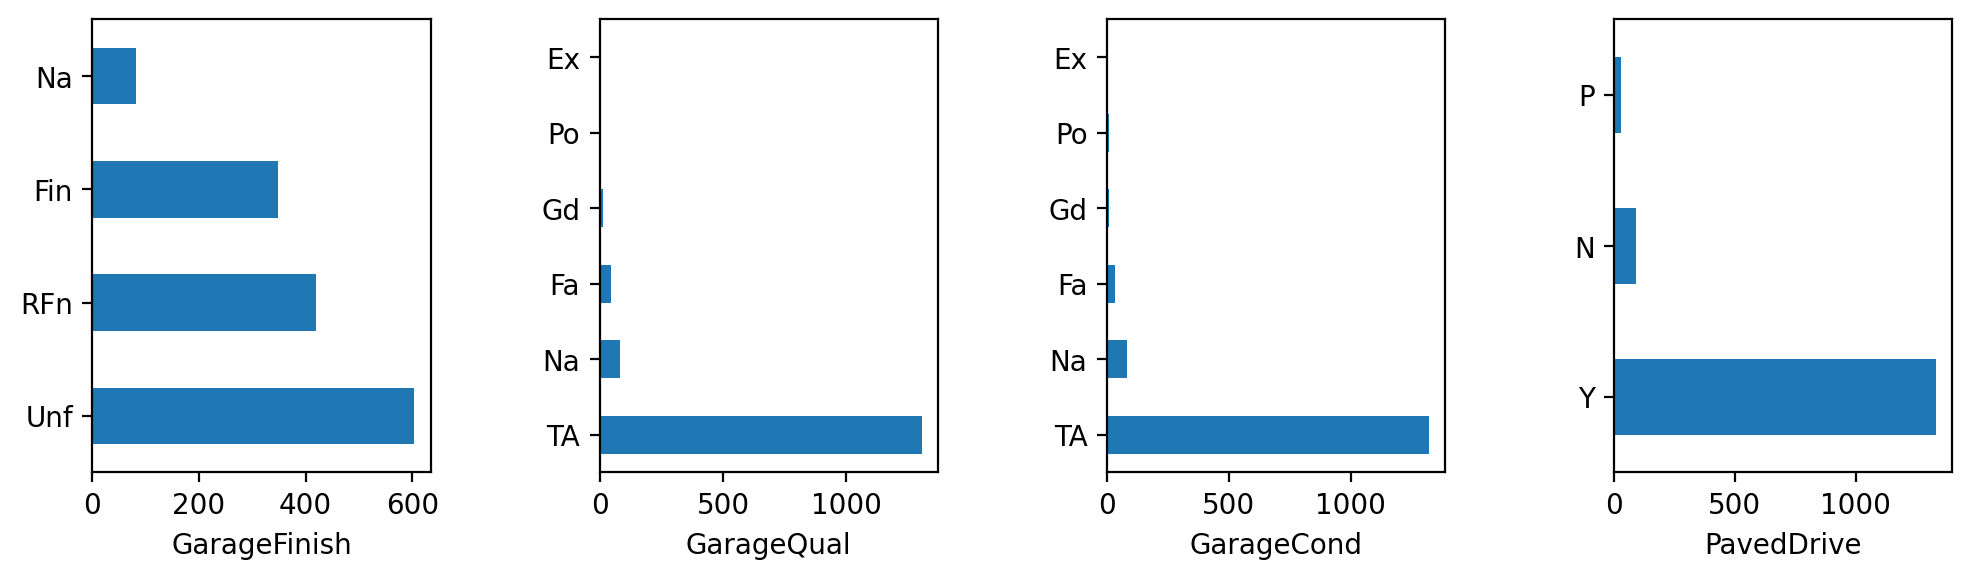

In [73]:
plot_barh(df=train, cols=object_columns)

Имеется несколько признаков, в которых одна категория значительно преобладает над другими.  

Например:

In [74]:
train['Utilities'].value_counts()
train['Heating'].value_counts()

GasA     1423
GasW       17
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

Подобные признаки не смогут положительно повлиять на качество нашей модели.

In [75]:
to_drop = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating'] # 'RoofMatl', 'Heating'] ???

In [76]:
train.drop(to_drop, axis=1, inplace=True)
test.drop(to_drop, axis=1, inplace=True)
object_columns = object_columns.drop(to_drop)

In [77]:
train.shape

(1454, 54)

Длаее категории строчного типа следует привести к вещественному.
Однозначно отобразим каждое значение в уникальное число с помощью класса LabelEncoder библиотеки sklearn. Алгоритм случайного леса не является линейным алгоритмом, следоветльно, такой вид преобразования не скажется негативно на качетсве модели.

In [78]:
label_encoder = LabelEncoder()

for col in object_columns:
    train[col] = label_encoder.fit_transform(train[col])
    test[col] = label_encoder.fit_transform(test[col])
train.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,HeatingQC,CentralAir,Electrical,GrLivArea,BedroomAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalArea,TotalBath
0,1,60,3,9.042040,3,3,4,0,5,2,0,5,7,5,2003,2003,1,12,13,1,5.283204,2,4,2,2,4,4,2,6.561031,6,0,1,4,7.444833,3,2,6,0,3,1,2,548,5,5,2,0.000000,4.127134,2,2008,8,4,12.247699,2566,3.5
1,2,20,3,9.169623,3,3,2,0,24,1,0,2,6,8,1976,1976,1,8,8,2,0.000000,3,4,1,2,4,1,0,6.886532,6,0,1,4,7.141245,3,3,6,1,5,1,2,460,5,5,2,5.700444,0.000000,5,2007,8,4,12.109016,2524,2.5
2,3,60,3,9.328212,0,3,4,0,5,2,0,5,7,5,2001,2002,1,12,13,1,5.093750,2,4,2,2,4,2,2,6.188264,6,0,1,4,7.488294,3,2,6,1,5,1,2,608,5,5,2,0.000000,3.761200,9,2008,8,4,12.317171,2706,3.5
3,4,70,3,9.164401,0,3,0,0,6,2,0,5,7,5,1915,1970,1,13,15,2,0.000000,3,4,0,4,1,4,0,5.379897,6,2,1,4,7.448916,3,2,6,1,2,5,3,642,5,5,2,0.000000,3.583519,2,2006,8,0,11.849405,2473,2.0
4,5,60,3,9.565284,0,3,2,0,15,2,0,5,8,5,2000,2000,1,12,13,1,5.860786,2,4,2,2,4,0,2,6.486161,6,0,1,4,7.695758,4,2,6,1,5,1,2,836,5,5,2,5.262690,4.442651,12,2008,8,4,12.429220,3343,3.5


Данные готовы для обучения!

In [79]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,HeatingQC,CentralAir,Electrical,GrLivArea,BedroomAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalArea,TotalBath
0,1,60,3,9.042040,3,3,4,0,5,2,0,5,7,5,2003,2003,1,12,13,1,5.283204,2,4,2,2,4,4,2,6.561031,6,0,1,4,7.444833,3,2,6,0,3,1,2,548,5,5,2,0.000000,4.127134,2,2008,8,4,12.247699,2566,3.5
1,2,20,3,9.169623,3,3,2,0,24,1,0,2,6,8,1976,1976,1,8,8,2,0.000000,3,4,1,2,4,1,0,6.886532,6,0,1,4,7.141245,3,3,6,1,5,1,2,460,5,5,2,5.700444,0.000000,5,2007,8,4,12.109016,2524,2.5
2,3,60,3,9.328212,0,3,4,0,5,2,0,5,7,5,2001,2002,1,12,13,1,5.093750,2,4,2,2,4,2,2,6.188264,6,0,1,4,7.488294,3,2,6,1,5,1,2,608,5,5,2,0.000000,3.761200,9,2008,8,4,12.317171,2706,3.5
3,4,70,3,9.164401,0,3,0,0,6,2,0,5,7,5,1915,1970,1,13,15,2,0.000000,3,4,0,4,1,4,0,5.379897,6,2,1,4,7.448916,3,2,6,1,2,5,3,642,5,5,2,0.000000,3.583519,2,2006,8,0,11.849405,2473,2.0
4,5,60,3,9.565284,0,3,2,0,15,2,0,5,8,5,2000,2000,1,12,13,1,5.860786,2,4,2,2,4,0,2,6.486161,6,0,1,4,7.695758,4,2,6,1,5,1,2,836,5,5,2,5.262690,4.442651,12,2008,8,4,12.429220,3343,3.5


In [80]:
test.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,HeatingQC,CentralAir,Electrical,GrLivArea,BedroomAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,TotalArea,TotalBath
0,1461,20,2,9.360741,3,3,4,0,12,1,0,2,5,6,1961,1961,1,10,12,2,0.000000,3,4,1,4,4,4,5,6.150603,3,4,1,3,6.799056,2,3,6,0,3,1,3,730.0,4,5,2,4.948760,0.000000,6,2010,8,4,1778.0,1.0
1,1462,20,3,9.565775,0,3,0,0,12,2,0,2,6,6,1958,1958,3,11,13,1,4.691348,3,4,1,4,4,4,0,6.828712,6,4,1,3,7.192934,3,2,6,0,3,1,3,312.0,4,5,2,5.976351,3.610918,6,2010,8,4,2658.0,1.5
2,1463,60,3,9.534668,0,3,4,0,8,2,0,4,5,5,1997,1998,1,10,12,2,0.000000,3,4,2,2,4,4,2,6.674561,6,2,1,3,7.396335,3,3,6,1,5,1,0,482.0,4,5,2,5.361292,3.555348,3,2010,8,4,2557.0,2.5
3,1464,60,3,9.208238,0,3,4,0,8,2,0,4,6,6,1998,1998,1,10,12,1,3.044522,3,4,2,4,4,4,2,6.401917,6,0,1,3,7.380879,3,2,6,1,2,1,0,470.0,4,5,2,5.888878,3.610918,6,2010,8,4,2530.0,2.5
4,1465,120,3,8.518392,0,1,4,0,22,2,4,2,8,5,1992,1992,1,6,6,2,0.000000,2,4,2,2,4,4,0,5.575949,6,0,1,3,7.155396,2,2,6,0,3,1,2,506.0,4,5,2,0.000000,4.418841,1,2010,8,4,2560.0,2.0


## Обучение модели

In [108]:
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']
X_test = test
y_test = pd.read_csv('data/sample_submission.csv')['SalePrice']

In [109]:
X_test.shape

(1459, 53)

In [110]:
X_train.shape

(1454, 53)

### Решающее дерево

In [111]:
dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)
d_predict = np.expm1(d_predict)
np.sqrt(mean_squared_error(d_predict, y_test))

75665.93441780364

score from Kaggle: 0.21018

### Бэггинг решающих деревьев

In [114]:
# Bagging decision tree regressor
bdt = BaggingRegressor(DecisionTreeRegressor()).fit(X_train, y_train)
bdt_predict = bdt.predict(X_test)
bdt_predict = np.expm1(bdt_predict)
np.sqrt(mean_squared_error(bdt_predict, y_test))

72331.99602097803

score from Kaggle: 0.15519

### Случайны лес без настройки параметров

In [115]:
# Random Forest
forest = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
forest_predict = forest.predict(X_test)
forest_predict = np.expm1(forest_predict)
np.sqrt(mean_squared_error(forest_predict, y_test))

71795.52065168932

score from Kaggle: 0.16415

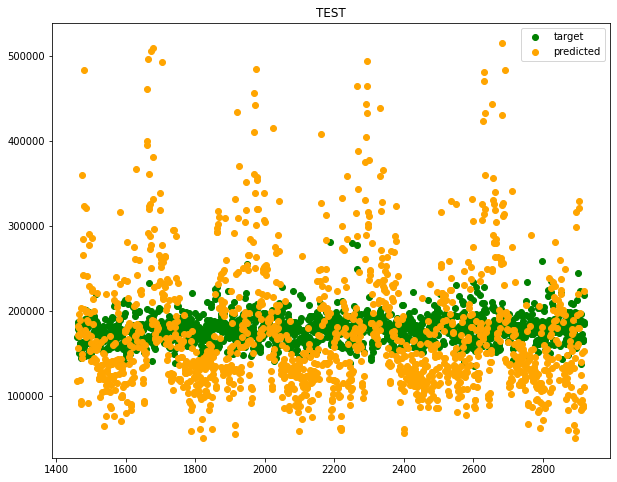

In [116]:
plt.scatter(X_test['Id'], y_test, c='green', label='target')
plt.scatter(X_test['Id'], forest_predict, c='orange', label='predicted')
plt.title('TEST')
plt.legend()

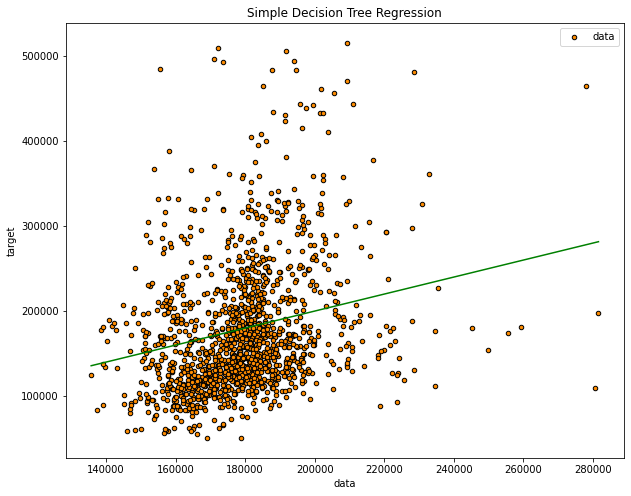

In [117]:
# Plot the results
plt.figure()
plt.scatter(y_test, forest_predict, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], c="green")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Simple Decision Tree Regression")
plt.legend()
plt.show()

### Случайны лес с настройкой параметров

In [141]:
n_estimators = [100, 300, 500, 800]
max_features = [0.2, 0.3, 0.4]
max_depths = [10, 20]
min_samples_leaves = [1, 3, 5]

params = {
    "n_estimators": n_estimators, 
    "max_features": max_features,
    "max_depth": max_depths,
    "min_samples_leaf": min_samples_leaves
}

rf = RandomForestRegressor(n_jobs=-1, verbose=2)
est = GridSearchCV(rf, param_grid=params)

In [142]:
%%time
est.fit(X_train, y_train).best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]:

[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 349 tasks      | ela

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend L

[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jo

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | ela

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | ela

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using

[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks  

[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | ela

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend L

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using

[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | ela

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend L

[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | ela

building tree 1 of 800
building tree 2 of 800
building tree 3 of 800
building tree 4 of 800
building tree 5 of 800
building tree 6 of 800
building tree 7 of 800
building tree 8 of 800
building tree 9 of 800
building tree 10 of 800
building tree 11 of 800building tree 12 of 800
building tree 13 of 800

building tree 14 of 800building tree 15 of 800

building tree 16 of 800
building tree 17 of 800
building tree 18 of 800building tree 19 of 800building tree 20 of 800


building tree 21 of 800building tree 22 of 800
building tree 23 of 800

building tree 24 of 800
building tree 25 of 800building tree 26 of 800

building tree 27 of 800building tree 28 of 800

building tree 29 of 800
building tree 30 of 800building tree 31 of 800
building tree 32 of 800

building tree 33 of 800
building tree 34 of 800
building tree 35 of 800
building tree 36 of 800
building tree 37 of 800
building tree 38 of 800
building tree 39 of 800building tree 40 of 800

building tree 41 of 800
building tree 42 of 800
b

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    0.4s


building tree 185 of 800building tree 186 of 800
building tree 187 of 800

building tree 188 of 800building tree 189 of 800

building tree 190 of 800
building tree 191 of 800
building tree 192 of 800
building tree 193 of 800
building tree 194 of 800building tree 195 of 800building tree 196 of 800


building tree 197 of 800
building tree 198 of 800building tree 199 of 800

building tree 200 of 800
building tree 201 of 800building tree 202 of 800
building tree 203 of 800building tree 204 of 800
building tree 205 of 800
building tree 206 of 800

building tree 207 of 800
building tree 208 of 800

building tree 209 of 800building tree 210 of 800
building tree 211 of 800

building tree 212 of 800building tree 213 of 800

building tree 214 of 800building tree 215 of 800
building tree 216 of 800

building tree 217 of 800
building tree 218 of 800building tree 219 of 800building tree 220 of 800

building tree 221 of 800

building tree 222 of 800
building tree 223 of 800
building tree 224 of 800


[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    0.9s


building tree 436 of 800building tree 437 of 800building tree 438 of 800


building tree 439 of 800
building tree 440 of 800
building tree 441 of 800building tree 442 of 800
building tree 443 of 800

building tree 444 of 800building tree 445 of 800

building tree 446 of 800building tree 447 of 800
building tree 448 of 800building tree 449 of 800


building tree 450 of 800
building tree 451 of 800
building tree 452 of 800building tree 453 of 800

building tree 454 of 800
building tree 455 of 800
building tree 456 of 800building tree 457 of 800building tree 458 of 800
building tree 459 of 800


building tree 460 of 800
building tree 461 of 800
building tree 462 of 800building tree 463 of 800
building tree 464 of 800
building tree 465 of 800
building tree 466 of 800

building tree 467 of 800
building tree 468 of 800
building tree 469 of 800building tree 470 of 800building tree 471 of 800

building tree 472 of 800

building tree 473 of 800building tree 474 of 800
building tree 475 of 800



[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:    1.5s


building tree 698 of 800
building tree 699 of 800
building tree 700 of 800building tree 701 of 800building tree 702 of 800


building tree 703 of 800
building tree 704 of 800
building tree 705 of 800
building tree 706 of 800building tree 707 of 800

building tree 708 of 800building tree 709 of 800

building tree 710 of 800
building tree 711 of 800
building tree 712 of 800
building tree 713 of 800
building tree 714 of 800
building tree 715 of 800building tree 716 of 800

building tree 717 of 800building tree 718 of 800building tree 719 of 800


building tree 720 of 800
building tree 721 of 800
building tree 722 of 800
building tree 723 of 800
building tree 724 of 800
building tree 725 of 800building tree 726 of 800

building tree 727 of 800building tree 728 of 800

building tree 729 of 800
building tree 730 of 800
building tree 731 of 800building tree 732 of 800

building tree 733 of 800building tree 734 of 800

building tree 735 of 800
building tree 736 of 800
building tree 737 of 800


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    1.9s finished


{'max_depth': 20,
 'max_features': 0.3,
 'min_samples_leaf': 1,
 'n_estimators': 800}

{'max_depth': 20,
 'max_features': 0.2,
 'min_samples_leaf': 1,
 'n_estimators': 800}

In [ ]:
# На данный момент это лучший вариант:

In [151]:
params = {
    'n_jobs': -1, 
    'max_depth': 20, 
    'max_features': 0.2, 
    'min_samples_leaf': 1, 
    'n_estimators': 800
}
rf = RandomForestRegressor(**params).fit(X_train, y_train)
predict_test = rf.predict(X_test)
# predict_test = np.expm1(predict_test)
predict_train = rf.predict(X_train)
# predict_train = np.expm1(predict_train)

In [126]:
print("MSE:", mean_squared_error(predict_test, y_test))

MSE: 4635221077.000962


In [153]:
print("RMSE:", np.sqrt(mean_squared_error(predict_test, y_test)))

RMSE: 69557.89291818049


In [128]:
print("RMSE =", np.sqrt(np.mean((y_test - predict_test) ** 2)))

RMSE = 68082.45792420367


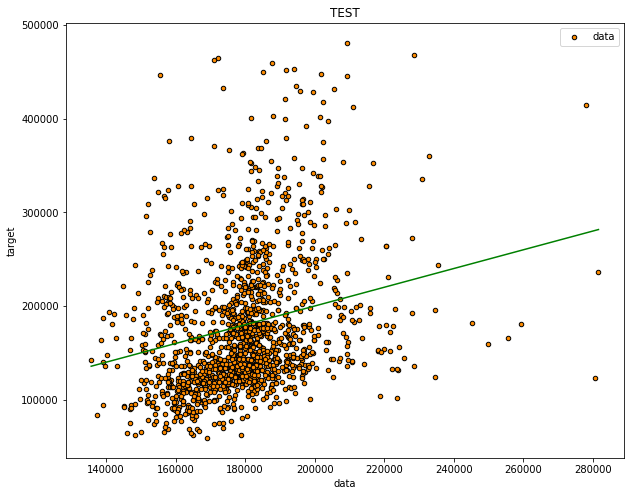

In [143]:
# Plot the results
plt.figure()
plt.scatter(y_test, predict_test, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], c="green")
plt.xlabel("data")
plt.ylabel("target")
plt.title("TEST")
plt.legend()
plt.show()

In [136]:
y_train = np.expm1(y_train)

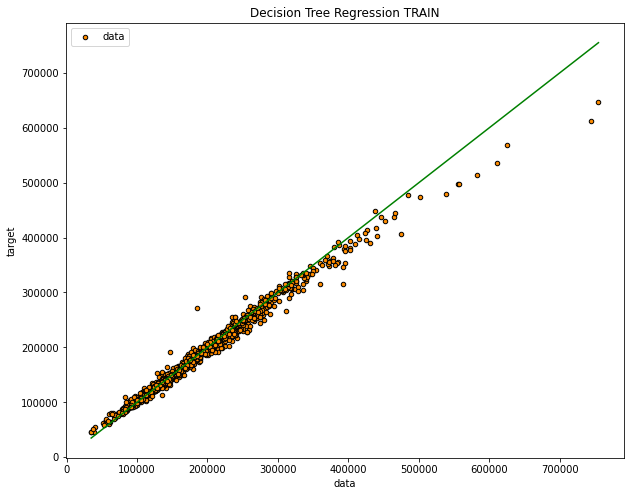

In [137]:
# Plot the results
plt.figure()
plt.scatter(y_train, predict_train, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], c="green")
plt.xlabel("data")
plt.ylabel("target")
plt.title("TRAIN")
plt.legend()
plt.show()

In [138]:
submission = pd.DataFrame({'Id' : test['Id'], 'SalePrice' : predict_test})
submission.to_csv("./submission-rf-29_05_2020.csv", index=False)

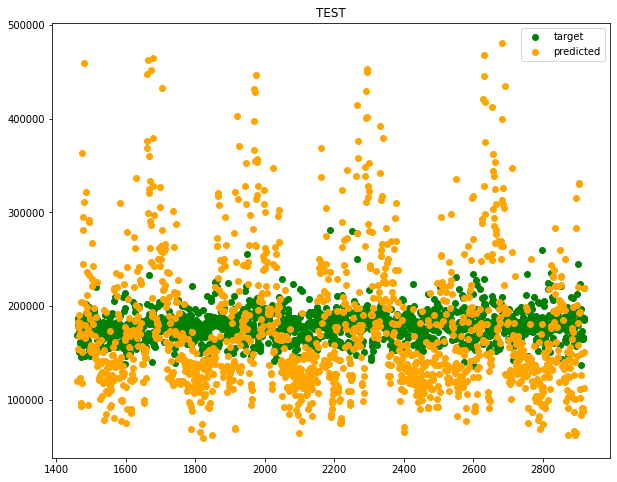

In [139]:
plt.scatter(X_test['Id'], y_test, c='green', label='target')
plt.scatter(X_test['Id'], predict_test, c='orange', label='predicted')
plt.title('TEST')
plt.legend()

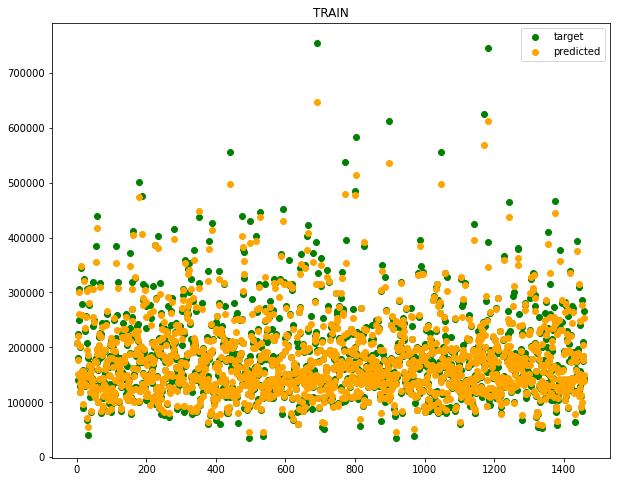

In [140]:
plt.scatter(train['Id'], y_train, c='green', label='target')
plt.scatter(train['Id'], predict_train, c='orange', label='predicted')
plt.title('TRAIN')
plt.legend()

In [ ]:
# # Визуализация одного дерева

# single_tree = rf.estimators_[5]

# from sklearn.tree import export_graphviz
# # Export as dot file
# export_graphviz(single_tree, out_file='tree.dot', 
#                 feature_names = train.columns[1:-1],
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

Without use skewed

    'max_depth': 20, 
    'max_features': 0.2, 
    'min_samples_leaf': 1, 
    'n_estimators': 800
    
Kaggle score: 0.14534

    'max_depth': 20, 
    'max_features': 0.2, 
    'min_samples_leaf': 1, 
    'n_estimators': 800

Kaggle score: 0.13938